<a href="https://colab.research.google.com/github/Coralain10/Python-Projects/blob/main/ADCSO_LB2_SJF_Anto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Ingresar a [Google Colab](https://colab.research.google.com)
2. Ir al tab Subir
3. Seleccionar el archivo .ipynb (jupyter notebook)
4. ¡Listo!

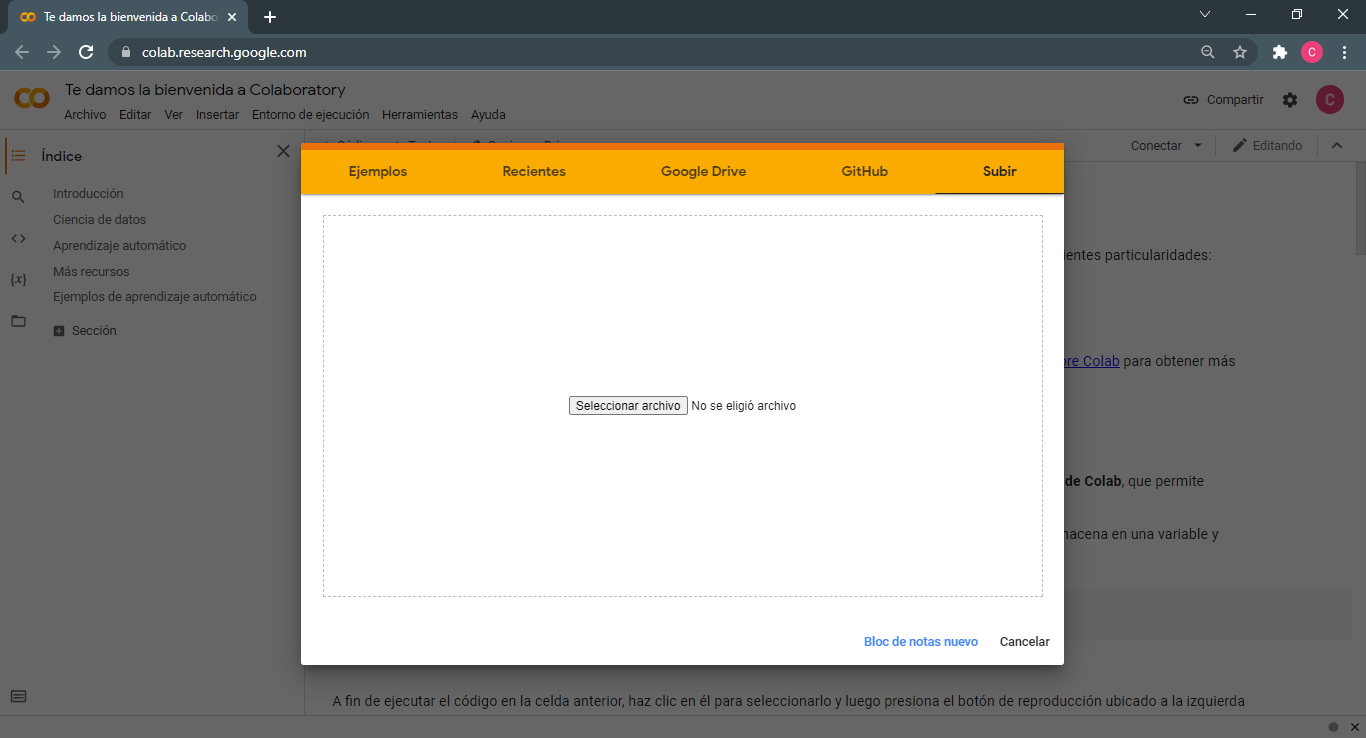

#Ejercicio SJF

In [6]:
#@markdown Librerías usadas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#@markdown Funcion principal
class Process: #ct complete time
  def __init__(self,id,bt,at): #ms = miliseg
    self.id = id
    self.bt = bt #burst time
    self.at = at #arrival time
    self.ct = None
    self.wt = None
    self.mss = None #msini start
    self.mse = None #msfin end
  def show(self):
    return f'P{self.id} a{self.at}b{self.bt} {self.mss}-{self.mse}'

class NP: #Administracion Non Preemtive
  def set_process_lst(self,fn):
    ps = []
    with open(fn) as f:
      for line in f:
        p = list(map(int,line.strip().split()))
        ps.append( Process(p[0],p[1],p[2]) )
    return ps

  def __init__(self,fn):
    self.ps = self.set_process_lst(fn)
    self.n = len(self.ps)

  def sort_process(self, by='at'):
    s = lambda p: eval('p.'+by)
    self.ps.sort(key = s)
  
  def show_process(self, attrs = 'bt,at'):
    attrs = attrs.split(',')
    attrs.insert(0,'id')
    #indicamos la data que se mostrará
    data = [ eval(','.join( ['p.'+a for a in attrs] )) for p in self.ps]
    #se muestra en formato de tabla
    df = pd.DataFrame(data,columns=attrs)
    display( df.style.hide_index() )
  
  def gantt(self,mslast=0):
    #mostrar gantt gráficamente con matplotlib
    pss = [ p.mss for p in self.ps ] #inicios
    psd = [ p.bt for p in self.ps ] #duraciones
    cs = plt.get_cmap('plasma')(np.linspace(0, 0.8, self.n)) #color
    plt.figure(figsize=(20,1))
    plt.title('Diagrama de Gantt', size=18)
    plt.barh(y=[0]*self.n, left=pss, width=psd, color=cs)
    for i in range(self.n): #textos
      txt = f'P{self.ps[i].id} ({self.ps[i].bt})'
      x = pss[i] + psd[i]/2 - len(txt)/12
      plt.text( x, 0, txt, color='white', fontweight='bold')
    plt.xticks(ticks=list(range(mslast+1))) #pasos
    plt.yticks(ticks=[0]) #solo 1 fila
    plt.xlim(0,mslast) #limites horizontales
    plt.box(False)
    plt.show()
    
  def meds_process(self):
    #actualizamos los valores totales y promedios
    awt = 0
    act = 0
    for p in self.ps:
      awt += p.wt
      act += p.ct
    print('TWT:', awt, '| AWT:', awt / self.n)
    print('TCT:', act, '| ACT:', act / self.n)
  
  def show_all(self):
    print('Listado de procesos')
    self.show_process()
    print('\n','Listado de procesos ordenados por at')
    self.sort_process('at')
    self.show_process()
    self.gantt()
    print('\n','Listado de procesos ordenados por ID y sus WT y CT')
    self.sort_process('id')
    self.show_process('mss,at,wt')
    self.show_process('mse,at,ct')
    self.show_process('wt,ct')
    self.meds_process()

In [3]:
#@markdown Shortest Job First
class NP_SJF(NP):
  def gantt(self):
    self.sort_process('at')
    pq = self.ps.copy() #lista auxiliar 1
    mslast = pq[0].at
    ph = [] #historial para mostrar gantt en texto
    
    while pq:
      #revisamos solo los que están hasta el momento
      #p.at < que el ultimo ms
      pm = list(filter(lambda p: p.at <= mslast, pq)) #lista auxiliar2
      #obtenemos el menor,
      #si no hay el primero proximo es el menor
      pm = min(pm, key = lambda p: p.bt ) if len(pm) > 0 else pq[0]
      #eliminarmos de la lista auxiliar 1
      #el que estamos por recorrer 
      pm = pq.pop( pq.index(pm) )
      #lo encontramos en la lista de la clase
      for p in self.ps:
        if p.id == pm.id: break
      #el proceso empiesza en el ultimo milisegundo (ms)
      #si el tiempo de llegada es menor a este,
      #sino empieza en el tiempo de llegada
      #asignamos sus valores
      p.mss = mslast if p.at <= mslast else p.at
      mslast = p.mss + p.bt
      p.wt = p.mss - p.at
      p.ct = mslast - p.at
      p.mse = mslast
      ph.append(p)

    print("\nDiagrama de gantt:")
    [print(f'[{p.mss}-P({p.id})-{p.mse}]',end=" ") for p in ph]
    print()
    super().gantt(mslast)

In [4]:
# ID BT AT (Id por orden de ingreso) Archivo usado en lugar de input
%%file process_np_sjf.txt
4 8 9
2 4 5
5 6 6
1 2 7
0 5 0

Writing process_np_sjf.txt


Listado de procesos


id,bt,at
4,8,9
2,4,5
5,6,6
1,2,7
0,5,0



 Listado de procesos ordenados por at


id,bt,at
0,5,0
2,4,5
5,6,6
1,2,7
4,8,9



Diagrama de gantt:
[0-P(0)-5] [5-P(2)-9] [9-P(1)-11] [11-P(5)-17] [17-P(4)-25] 


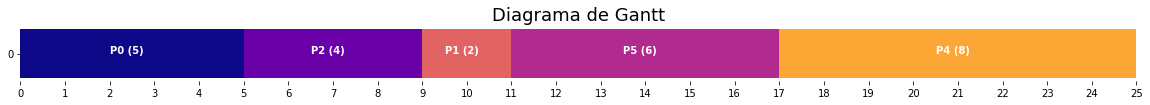


 Listado de procesos ordenados por ID y sus WT y CT


id,mss,at,wt
0,0,0,0
1,9,7,2
2,5,5,0
4,17,9,8
5,11,6,5


id,mse,at,ct
0,5,0,5
1,11,7,4
2,9,5,4
4,25,9,16
5,17,6,11


id,wt,ct
0,0,5
1,2,4
2,0,4
4,8,16
5,5,11


TWT: 15 | AWT: 3.0
TCT: 40 | ACT: 8.0


In [7]:
ps_npsjf = NP_SJF('process_np_sjf.txt')
ps_npsjf.show_all()